### Agenda
- Dimensionality Reduction
  - Principal Component Analysis
- Association Rules
  - Apriori


# Dimensionality Reduction Techniques

Dimensionality reduction involves decreasing the number of features (or dimensions) in a dataset while preserving as much information as possible. This technique is used for various purposes, such as simplifying a model, enhancing the performance of a learning algorithm, or making the data easier to visualize.


### Importance
1. **Improves computational efficiency:** Reduces the computational cost for data processing and model training.2. **Mitigates the curse of dimensionality:** Simplifies data to prevent overfitting and sparsity issues.3. **Reduces noise in data:** Eliminates irrelevant or noisy features to enhance model performance.4. **Enhances data visualization:** Makes high-dimensional data easier to visualize in 2D or 3D.5. **Boosts model performance:** Focuses on the most relevant features for better accuracy.6. **Saves storage and memory:** Decreases the amount of storage and memory needed for large datasets.7. **Increases model interpretability:** Simplifies models, making them easier to understand and explain.8. **Avoids multicollinearity:** Addresses high correlation between features to improve regression model


There are 2 approaches towards dimensionality reduction
- Feature Selection -  correlation, chi square test, ANOVA, Lasso
- Feature Extraction  - is the process of transforming high dimensional data into a lower dimensional space- PCA

### Principal Component Analysis
- Dimensionality
- Correlation
- Covariance
- Orthogonality
- Eigen Vector
- Eigen Values
- Variance


### Steps in PCA
  1. Standardization
  2. Covariance Matrix Computation
  3. Computing the eigrn vectors and eigen values to find principal Component
  4. Create a feature(using explained variance)
  5. Recast the data along the principal component axes 

In [1]:
# Use a breast cancer dataset from sk learn 

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
cancer =  load_breast_cancer(as_frame = True)
df = cancer.frame

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Extract the features set

X =  df.iloc[:, :-1]
X.shape

(569, 30)

In [8]:
# Step1 - Standardization

In [9]:
X_mean =  X.mean()
X_std = X.std()

Z = (X- X_mean)/X_std

In [10]:
# Calculate the covariance of martrix of Z

In [11]:
c =  Z.cov()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

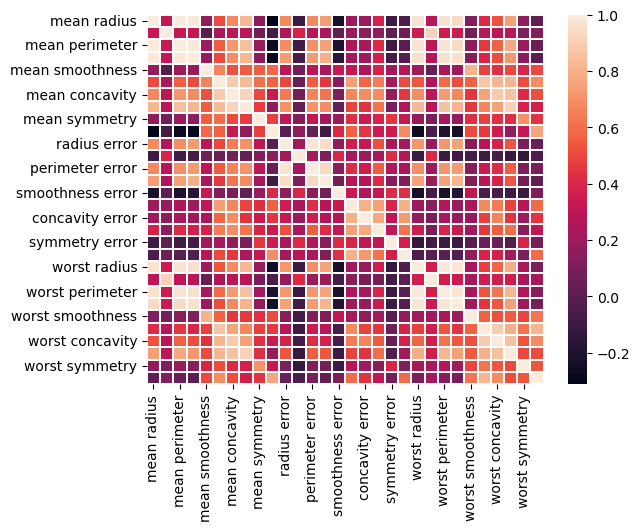

In [15]:
sns.heatmap(c, annot = False, linewidths =0.2)

In [16]:
# Step 3 - Find the eigen values and eigen vectors of the cov matrix

eigenvalues, eigenvectors = np.linalg.eig(c)

In [18]:
eigenvectors.shape

(30, 30)

In [20]:
# Sort Eigenvalues and Eigen Vectors in Descending order

idx = eigenvalues.argsort()[::-1]

eigenvalues=  eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

Explained Variance is the term that gives us an idea that how much variance is retained by a feature

In [76]:
eigenvalues

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

In [33]:
explained_var =  np.cumsum(eigenvalues)/np.sum(eigenvalues)

In [35]:
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [65]:
n_components = np.argmax(explained_var>= 0.5) +1

In [66]:
n_components

2

In [67]:
u = eigenvectors[:, :n_components]

pca_component =  pd.DataFrame(u, index = X.columns)
pca_component


,0,1
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


In [68]:
Z.shape

(569, 30)

In [69]:
pca_component.shape

(30, 2)

In [70]:
Z_pca = Z @ pca_component

In [71]:
Z_pca

,0,1
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components = 2)
pca.fit(Z)
X_pca = pca.transform(Z)

In [74]:
X_pca

array([[ 9.18475521,  1.94687003],
       [ 2.38570263, -3.76485906],
       [ 5.72885549, -1.07422859],
       ...,
       [ 1.25507494, -1.90062436],
       [10.36567336,  1.67054021],
       [-5.4704299 , -0.67004722]])

In [75]:
pca.explained_variance_

array([13.28160768,  5.69135461])

### Linear Discriminant Analysis

Linear discriminant analysis (LDA) is a technique used for dimensionality reduction and classification. It aims to project the data onto a lower-dimensional space in such a way that the separation between different classes is maximized. LDA focuses on finding a linear combination of features that best separate two or more classes of objects or events.


- LDA assumes the data follows a Gaussian distribution.- It assumes that the covariance matrices of different classes are equal.- It assumes the data is linearly separable, allowing for an accurate linear decision boundary to classify different classes.- It can reduce the dimensionality of the data to a maximum of $𝑘 − 1$ components, where $k$ is the number of classes in the target variable.

In [79]:
#Implemnent LDA

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [84]:
lda =  LDA(n_components =1)
X_lda  =  lda.fit_transform(Z, df['target'])
X_lda

array([[ 3.32392717e+00],
       [ 2.31910801e+00],
       [ 3.74742484e+00],
       [ 4.04854946e+00],
       [ 2.28115767e+00],
       [ 1.61150348e+00],
       [ 2.35653128e+00],
       [ 1.28122316e+00],
       [ 1.60828074e+00],
       [ 3.86266690e+00],
       [ 8.64980964e-01],
       [ 2.39981887e+00],
       [ 1.32670638e+00],
       [ 4.20145181e-01],
       [ 1.25084871e+00],
       [ 3.06625368e+00],
       [ 2.11049829e+00],
       [ 3.17780841e+00],
       [ 3.43796946e+00],
       [-2.23125867e-01],
       [-1.97973275e+00],
       [-2.46635453e+00],
       [ 1.79100127e+00],
       [ 3.02554197e+00],
       [ 3.87178737e+00],
       [ 3.99524140e+00],
       [ 2.74537482e+00],
       [ 2.57652189e+00],
       [ 3.07566630e+00],
       [ 8.02258881e-01],
       [ 3.41613522e+00],
       [ 2.67943316e+00],
       [ 3.63987363e+00],
       [ 3.07550539e+00],
       [ 2.68840028e+00],
       [ 2.57312945e+00],
       [ 1.07380321e+00],
       [-1.87492316e+00],
       [-4.9